### Python教科書　5章プログラム例

#### 5-1-1 データサイエンスとは

可視化の例
* 教科書中にプログラムの記載はありません

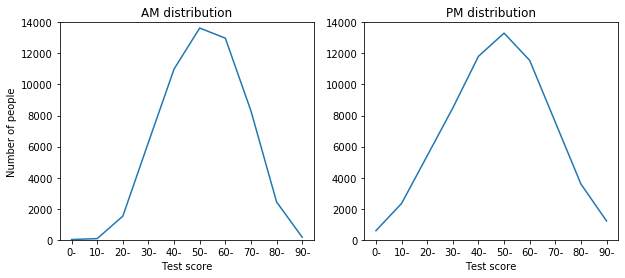

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

bunpu_csv = 'FE2019a_distribution.csv'                          # 2019年秋FEの得点分布CSV
df = pd.read_csv(bunpu_csv, index_col=0, parse_dates=['Score'])

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(df.index, df['AM'])
ax2.plot(df.index, df['PM'])

ax1.set_ylim(0, 14000)
ax2.set_ylim(0, 14000)
ax1.set_title('AM distribution')
ax2.set_title('PM distribution')
ax1.set_xlabel('Test score')
ax2.set_xlabel('Test score')
ax1.set_ylabel('Number of people')

plt.show()

#### 5-1-2 データ分析用ライブラリ

NumPyのインポート

In [2]:
import numpy as np

【例】－5から6未満の整数の配列を作成

In [3]:
x = np.arange(-5, 6, 1)
print(x)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


【例】xのすべての値に対して，y = x<sup>2</sup>を演算

In [4]:
y = x ** 2
print(y)

[25 16  9  4  1  0  1  4  9 16 25]


Matplotlibのインポート

In [5]:
import matplotlib.pyplot as plt

【例】ベクトルデータを座標の値に変換して線を引く 

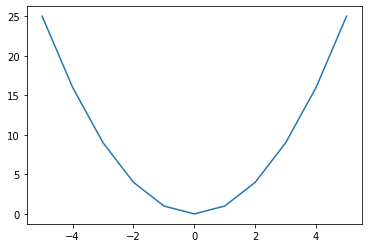

In [6]:
plt.plot(x, y)
plt.show()

Pandasのインポート  

In [7]:
import pandas as pd

【例】CSVファイルを読み込みDataFrame形式にする 

In [8]:
df = pd.read_csv('FE2019a_distribution.csv', index_col=0, parse_dates=['Score'])

【例】DataFrame形式のデータを表示

In [9]:
print(df)

          AM     PM
Score              
0-        19    589
10-       76   2342
20-     1525   5411
30-     6279   8490
40-    10997  11813
50-    13634  13308
60-    12982  11551
70-     8301   7571
80-     2440   3591
90-      166   1212


【例】DataFrame形式データの列ごとの合計を計算

In [10]:
print('午前の合計人数', df['AM'].sum())
print('午後の合計人数', df['PM'].sum())

午前の合計人数 56419
午後の合計人数 65878


【例】Matplotlibと組み合わせ，グラフを表示

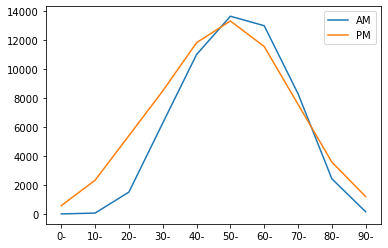

In [11]:
plt.plot(df.index, df['AM'], label='AM') # 午前の折れ線グラフ
plt.plot(df.index, df['PM'], label='PM') # 午後の折れ線グラフ
plt.legend()                             # 凡例を表示させる

plt.show()

### 5-1-3 演習問題
##### 問3　数式処理
a及びbを定数とする関数 
$$
f(t)=\frac{a}{t+1}
$$
及び
$$
g(t)=\frac{b}{t^2-t}
$$
に対して，
$$
\lim_{t \to \infty}\frac{g(t)}{f(t)}
$$
はどれか。ここで，a≠0，b≠0，t>1とする。

##### 問3　解答　
関数，f(t)，g(t)をあてはめて式を変形すると，次のようになります。

$$
\lim_{t \to \infty}\frac{g(t)}{f(t)}=\lim_{t \to \infty}\frac{\frac{b}{t^2-t}}{\frac{a}{t+1}}=\lim_{t \to \infty}\frac{b(t+1)}{a(t^2-t)}
$$

ここで，分母，分子ともにt<sup>2</sup>で割り，t→∞とすると，次のようになります。

$$
\lim_{t \to \infty}\frac{b(t+1)}{a(t^2-t)}=\lim_{t \to \infty}\frac{b(\frac{1}{t}+\frac{1}{t^2})}{a(1-\frac{1}{t})}=\frac{a(0+0)}{b(1+0)}=\frac{0}{b}=0
$$

したがって0になりますので，アが正解です。

ここで，次のようなプログラムで，NumPyとMatplotlibを使用すると，tを増やしたときの値を計算してみることができます。（aとbは1に設定しています）

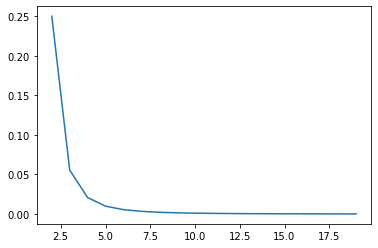

In [12]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 1, 1
t = np.arange(2, 20, 1)  # tを2から順に増やしてみる
f = a / (t + 1)          # 関数f(t)を計算
g = b / (t ** 2 - t)     # 関数g(t)を計算
lim = g / t              # limの値を計算

plt.plot(t, lim)       # tとlimの関係を表示
plt.show()

#### 5-2-2 機械学習

Tensorflowのインストール　（必要な場合。Anacondaでも，tensorflowはインストールが必要）

In [ ]:
!pip install tensorflow

MNIST画像作成用プログラム
* 教科書には画像があるだけで，プログラムは掲載していません（28×28の画像）

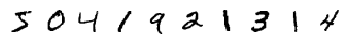

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(train_images[i], cmap=plt.cm.gray_r)
plt.show()

【例】MNISTデータのダウンロード

In [20]:
from sklearn import datasets
digits = datasets.load_digits() # 手書き数字データ(8×8)の読み込み

【例】トレーニングデータとテストデータに分割

In [22]:
train_size = int(len(digits.data) * 4 / 5)   # トレーニング／テストデータの区切り
train_data = digits.data[:train_size]        # トレーニングデータ
train_label = digits.target[:train_size]     # トレーニングデータの正解
test_data = digits.data[train_size:]         # テストデータ
test_label = digits.target[train_size:]      # テストデータの正解

【例】機械学習を実行し，学習済モデルを作成

In [23]:
from sklearn import tree
model = tree.DecisionTreeClassifier()      # 機械学習アルゴリズム（決定木）を指定
model.fit(train_data, train_label)         # 機械学習を実行し，モデルを作成

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

【例】正解の予測と実際の正解を比較

In [24]:
from sklearn.metrics import accuracy_score
predicted = model.predict(test_data)       # モデルを使ってテストデータを予測
print('Accuracy: ',accuracy_score(test_label, predicted)) # 予測と正解から正答率を算出

Accuracy:  0.775


【例】TensorFlowでMNISTのデータを取得

In [25]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 手書き数字データ(28×28)の読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

【例】TensorFlowでディープラーニングのモデルを設定

In [26]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # データの正規化
model = tf.keras.models.Sequential([              # モデルを設定
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

【例】model.fit()メソッドでディープラーニングを実行

In [27]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3036 - accuracy: 0.9143
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1502 - accuracy: 0.9563
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1112 - accuracy: 0.9672
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0877 - accuracy: 0.9734
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0725 - accuracy: 0.9780


【例】テストデータによる評価

In [28]:
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)
print('Accuracy: ', accuracy)

10000/10000 - 0s - loss: 0.0939 - accuracy: 0.9718
Accuracy:  0.9718
